# ** 20-02-22 **

#There are categories feature selection methods. Feature selection methods are classified in these categories:

1. wrapper based
2. filter based
3. embedded
4. Hybrid

Note : PCA is used to reduce the dimension of our data, we can also use feature selection method to reduce the dimension of our data.

-- Will compare PCA and feature selection method..to see whether we should go for PCA or any feature selection method --


In [ ]:
from sklearn.datasets import load_iris
data= load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X, y =load_iris(return_X_y=True)
X #features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y #target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

X, y only shows us values in an array. In X we don;t know which value belong to which feature.

**Converting data into DataFrame so that after feature selection we know which feature have been selected bcz. without knowing it'll be difficult to know which features have been selected :**

In [ ]:
import pandas as pd
df=pd.DataFrame(X)  #feature values will be displayed without feature name
df.columns=data.feature_names #each feature name will be displayed at the top of cloumns
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#concatenating a cloumn named 'target' in df having target values 
df['target']=data.target 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Features are selected in a way that if different features have similar values they are eliminated and only one is kept.**

**According to statistical nomenclature it is know as correlation between the features.**

The correlation between the features can be high or low.

#Checking correlation b/w features so that we can apply any feature selection technique :

In [ ]:
#checking correlation b/w features based on the target using corr()
corr1=df.corr()['target']
corr1

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

In O/p we can see that, 4 features & 1 target are there and some values are written corresponding to each but we are not able to predict anything from the output. We want correlation b/w 2 features (i.e. pairwise correlation).

But in above o/p there is no pairwise correlation, therefore we are not able to interpret anything.

#Heat map :

**--We have matrix visualization of correlation value pairwise using method known as heat map--**

Heat map is graphical representaion.

In heatmap() we will pass df.corr() as a parameter.

There are several types of correlations. One of the most generalized method is 'pearson' we'll pass it in correlation to calculate the pairwise correlation : df.corr(method='perarson').

Second parameter in heatmap() that we'll pass will be annotation for labeling as our pairwise correlation will be displayed in matrix form. So, for labeling (to display correlation value in heatmap) we use annotation=TRUE.

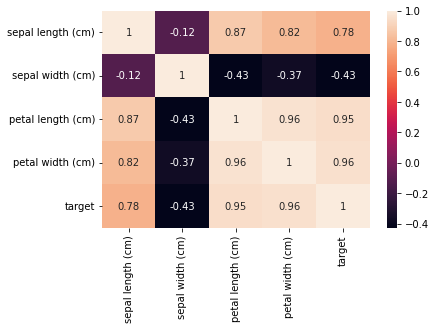

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(method='pearson'),annot=True)

In above o/p we can see that 1 is for the same feature and target pair(1 correlation value) as correlation value is high.

Correlation b/w petal length & petal width (0.96 correlation value) is high bcz they are highly correlated and correlation b/w petal length-target(0.95), petal width-target(0.96) is also high bcz of high correlation.

As petal length and petal width is highly correlated(positively correlated) to target as the target correlation value is 1, so we'll choose them in feature selection as they we'll be most important for predicting the target.

So our new feature set will be {petal length, petal width).

If we want to select more features, first sepal length will be prefered then sepal width. (we'll select on based of what is highly correlated to the target)

#1. Filter based feature selection method : (SelectKBest)

SelectKBest - selecting K features 

chi2 - SelectKBest feature selection method will calculate something so the it is able to select most close features with the target, so the method we will be taking here is chi2 i.e. chi square

chi2 is the summission of [(actual values(y test) - y pred)/ predicted value i.e. y pred]

or,

The chi-square formula is: χ2 = ∑(Oi – Ei)2/Ei, where Oi = observed value (actual value) and Ei = expected value.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#instead of SelectKBest we can also use PCA

separating features & target bcz we'll apply transformation on features only

in df we have both features and target, therefore removing target as we need features only :

In [ ]:
X=df.drop('target', axis=1) #X contains features
y=df.target #y contains target

using chi2 method , taking 2 features :

In [ ]:
fs=SelectKBest(chi2,k=2) #fs is our model

giving features to fit in our model using feature selection.

Model will select features based on target, therefore we are passing y also :

(petal length & petal width will be selected as they are most correlated to our target)

In [ ]:
fs=fs.fit(X,y)

Transforming X i.e. 4 features into 2 variables (i.e. petal length, petal width) i.e. earlier dimension was 150 x 4 now it'll become 150 x 2:

(transfrming only X as y is target and we don't neet to tarnsform it, our features will be selected based on target)

In [ ]:
X_best=fs.transform(X)

displaying selected features :

In [ ]:
X_best

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

we don't know the name of features (which are selected) , therefore determining the features which are selected :

(using support value we will fetch the selected column(features))

In [ ]:
colmn1=fs.get_support(indices=True) #indices used for knowing the indexes of selected features in df
colmn1

#in df, column index: 2= petal length, 3= petal width

array([2, 3])

loc : used for rows

iloc: used for columns

syntax: 
dataframe.iloc[row, column]

in below code we used X.iloc[:,colmn1], : denotes selecte all the rows, colmn1 denotes selected columns present in colmn1

but, in the above code, we'll only know the index of our features.

for knowing name and value of the selected features (using iloc[]):

In [ ]:
new_features = X.iloc[:,colmn1]
new_features

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


----

**SelectkBest method is the most simplest filter based feature selection method.**

**SelectkBest method based on chi2 distribution.**

---

#Comparing SelectKBest

->new_features (new features, having 2 features : peatl length, petal width)

->y (target)

Splitting our data :

In [ ]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, ytrain, ytest = train_test_split(new_features, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model=model.fit(Xtrain,ytrain)

In [ ]:
y_pred=model.predict(Xtest)

#Classification report :

A Classification report is used to measure the quality of predictions from a classification algorithm.

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



accuracy 1.00 denotes 100% accuracy.

i.e. our model is giving 100% accuracy.

----

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. 

There are four ways to check if the predictions are right or wrong:

TN / True Negative: when a case was negative and predicted negative

TP / True Positive: when a case was positive and predicted positive

FN / False Negative: when a case was positive but predicted negative

FP / False Positive: when a case was negative but predicted positive


-> 1. Precision – What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives

FP – False Positives

Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)


-> 2. Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.



-> 3. FN – False Negatives


Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

-> 4. F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)